<a href="https://colab.research.google.com/github/JamesWWhiteJr/Tools/blob/master/Single_Asset_Utility.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Single Asset Optimizer

There's a single risky asset $A$ (which may represent a portfolio of may individual asset) with expected return $\mu$ and volatility $\sigma$.  The asset follows a geometric brownian motion, and there's also a risk-free asset with rate $r$.  We continuously rebalance the portfolio to hold fraction $\kappa$ in the risky asset, and want to find the best choice of $\kappa$.  We have CRRA utility, and as usual we want to optimize expected utility, so we have:

\begin{equation}
u(w) = \begin{cases}
\frac{w^{1-\gamma} - 1}{1-\gamma}, & \gamma \neq 1 \\ \\
ln(w), & \gamma = 1 \tag{1}
\end{cases}
\end{equation}

\begin{equation}
U(\kappa) =  \mathbb{E}[u(P_T)]  \tag{2}
\end{equation}

\begin{equation}
P_T = P_0 e^{(r + (\mu-r)\kappa-\frac{1}{2}\kappa^2\sigma^2)T + \kappa\sigma Z_T} \tag{3}
\end{equation}






In [48]:
#@title Inputs 
mu =   0.05#@param {type: "number"}
sigma = 0.20 #@param {type:"number"}
r = 0.01 #@param {type:"number"}
T = 1 #@param {type:"number"}
gamma = 2 #@param {type:"number"}
kappa_max =  2#@param {type:"number"}

# (Ctrl + F9) to run

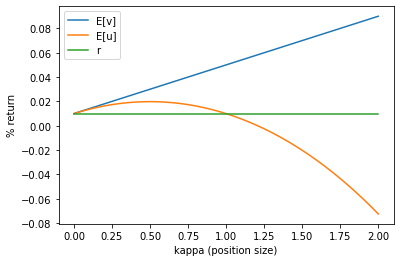

In [49]:
#@title (Double-click to unhide Python code) {display-mode: "form"}

import numpy as np
from scipy.optimize import minimize
from scipy.stats import norm
import matplotlib.pyplot as pyp

int_range = 5
int_step = 0.01
theta_step = 0.25
kappa_step = 0.01
g_step = 0.01
T_step = 1

# Some inline functions we need
u = lambda x: (np.power(x, 1-gamma) - 1) / (1 - gamma)
P_T = lambda kappa, z: np.exp((r + (mu-r)*kappa - 0.5*pow(kappa, 2)*pow(sigma, 2))*T + kappa*sigma*(T**0.5)*z)

# And some data structures
z_size = int(2 * int_range/int_step + 1)
Z = np.linspace(-int_range, int_range, endpoint=True, num=z_size)
probs = norm.pdf(Z)

def expected_util(x: np.array, optim: bool = False) -> float:
    # x[0] = kappa
    E_u = (u(P_T(x[0], Z))  * probs).sum() / probs.sum()

    return (-1 if optim else 1) * E_u


# The Main Event
# Plotting E[u] vs. kappa
kappa_vec = np.linspace(0, kappa_max, endpoint=True, num=int(kappa_max/kappa_step+1))
u_vec = np.zeros(len(kappa_vec))

for i, kappa in enumerate(kappa_vec):
    u_vec[i] = expected_util(np.asarray([kappa]))

# Display
pyp.plot(kappa_vec, r*T + (mu-r)*T*kappa_vec, label='E[v]')
pyp.plot(kappa_vec, u_vec, label='E[u]')
pyp.plot(kappa_vec, r*T*np.ones(len(kappa_vec)), label='r')
pyp.xlabel('kappa (position size)')
pyp.ylabel('% return')
pyp.legend()
pyp.show()

